In [2]:
%pip install mlxtend --upgrade
import math
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import gutenberg
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import ShuffleSplit
from mlxtend.evaluate import bias_variance_decomp
from sklearn import preprocessing
import gensim as gm
from gensim import corpora
from gensim.models import Word2Vec
from gensim.models.word2vec import Word2Vec
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import cohen_kappa_score
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import CoherenceModel
import seaborn as sns
import wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
nltk.download("stopwords")
nltk.download("wordnet")
print(stopwords.words('english'))
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from urllib import request


url1 = "https://www.gutenberg.org/files/25500/25500-8.txt"          #  A London Life  by Henry James:
url2 = "https://www.gutenberg.org/files/47873/47873-8.txt"      #  Malay Magic by  Walter William Skeat
url3 = "https://www.gutenberg.org/files/70675/70675-0.txt"      #  Chicago by day and night by Anonymous
url4 = "https://www.gutenberg.org/files/40549/40549-0.txt"             #  The Private Life of the Romans by Harold Whetstone Johnston
url5 = "https://www.gutenberg.org/files/41751/41751-8.txt"      #  Travels in Central Asia  by  Arminius Vámbéry

urls = [url1 ,url2 ,url3, url4 ,url5]
Books_names = ["Travels in Central Asia" ," Chicago by day and night" , "A London Life"  , "Malay Magic " ,"The Picture of Dorian Gray"]
Books_label = [ 'a' ,'b' ,'c','d' ,'e']
Authors = ["Arminius Vámbéry" ,"Anonymous" ,"Henry James" , "Walter William Skeat" ," Harold Whetstone Johnston"]
Books_contents = []

for U  in urls :
  response = request.urlopen(U)
  raw = response.read().decode('iso-8859-1' )
  text= re.findall(r"[a-zA-Z]{3,}", raw)
  lemmatizer = WordNetLemmatizer()
  lst =[]
  for i in text:
    W = i.lower()
    w = lemmatizer.lemmatize(W)
    if w not in set(stopwords.words('english')):
      lst.append(str(w))
  Books_contents.append(lst)

    # make sure that all lists contain 150 word
Books_contents_150 = []
for i in Books_contents:
  l = i[0:(math.floor(len(i)/150)) * 150]
  Books_contents_150.append(l)



# combine all lists in one dataframe
data = pd.DataFrame()

for i in range(len(Books_contents_150)):
    dic = {}

    lis =  [Books_contents_150[i][x:x+150] for x in range(0, len(Books_contents_150[i]), 150)]

    dic['index']= i  # refer to the number of the book
    dic['Authors']= Authors[i]
    dic['title']= Books_names[i] # refer to the book name
    dic['label'] = Books_label[i]
    dic['partitions'] = lis # the partition of 100 words
    df_0 = pd.DataFrame(dic)
    for i in range(len(df_0)):
      df_0["partitions"][i] = " ".join(df_0["partitions"][i])
    df = df_0[:200]
    data = data.append(df)

data.head()


<ipython-input-5-97a51034ad17>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["partitions"][i] = " ".join(df_0["partitions"][i])
<ipython-input-5-97a51034ad17>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df)
<ipython-input-5-97a51034ad17>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["partitions"][i] = " ".join(df_0["partitions"][i])
<ipython-input-5-97a51034ad17>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

,index,Authors,title,label,partitions
0,0,Arminius Vámbéry,Travels in Central Asia,a,project gutenberg ebook london life patagonia ...
1,0,Arminius Vámbéry,Travels in Central Asia,a,old mr berrington liked wa simple old lady dav...
2,0,Arminius Vámbéry,Travels in Central Asia,a,honour abundance attend ever condemnation wron...
3,0,Arminius Vámbéry,Travels in Central Asia,a,wet air tone mottled red wall limited perfect ...
4,0,Arminius Vámbéry,Travels in Central Asia,a,mr berrington parlour lady davenant always hea...


In [6]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

# **Mapping labels**

In [7]:
def map_labelv2(labels,old_labels,num_class=5):
    new_labels=[]

    for idx in range(5):
        dict_labels=Counter(labels[200*idx:200*idx+200])
        temp=0

        for i in dict_labels:

            if dict_labels[i]> temp and i not in new_labels :

                temp=dict_labels[i]
                index=i
        if index not in new_labels:
          new_labels.append(index)
        else:
          for i in range(5):
            if i not in new_labels:
              new_labels.append(i)



    for indx , label in enumerate(new_labels):
        old_labels[indx*200:200*indx+200]=label
    return old_labels

## **Bag OF Words**

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_Vec= CountVectorizer()
bow = count_Vec.fit_transform(data['partitions'])
bow_df = pd.DataFrame(bow.toarray(), columns=count_Vec.get_feature_names_out())
bow_df

,aba,abac,aback,abacus,abah,abandon,abandoned,abandoning,abandonment,abashed,...,zimmerman,zinde,zirab,zona,zone,zonino,zoninus,zoological,zul,zum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x= bow_df.values
y = data['label'].values

print(x.shape)
print(y.shape)


(989, 16739)
(989,)


# **TF_IDF**

In [10]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['partitions'])
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df

,aba,abac,aback,abacus,abah,abandon,abandoned,abandoning,abandonment,abashed,...,zimmerman,zinde,zirab,zona,zone,zonino,zoninus,zoological,zul,zum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
xx= tfidf.toarray()
yy = data['label']

print(xx.shape)
print(yy.shape)



(989, 16739)
(989,)


## **LDA**

In [12]:
lda=LatentDirichletAllocation(n_components=5,random_state=0)

In [13]:
lda.fit(bow_df)

LatentDirichletAllocation(n_components=5, random_state=0)

In [14]:
lda_df = lda.transform(bow_df)

In [15]:
lda_df

array([[0.46627912, 0.00134267, 0.00134319, 0.00134422, 0.5296908 ],
       [0.00135767, 0.0013611 , 0.00134223, 0.0013527 , 0.9945863 ],
       [0.00135976, 0.00134952, 0.00133753, 0.1724325 , 0.82352069],
       ...,
       [0.00134431, 0.14369179, 0.0013627 , 0.00136581, 0.8522354 ],
       [0.00134087, 0.0013494 , 0.23071889, 0.46877331, 0.29781753],
       [0.00135194, 0.00136995, 0.00136633, 0.00136113, 0.99455065]])

In [16]:
lda_pred = lda_df.argmax(axis=1)

In [17]:
lda_pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 3, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3,
       2, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2,
       3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 4, 3, 3, 2, 3, 3, 3,

## **Word_Embidding**

In [18]:
sentence = data['partitions'].tolist()
splitted_sent = [sen.split() for sen in sentence ]
print(len(splitted_sent))

989


In [19]:
word_2_vec_model = Word2Vec(splitted_sent,
                            min_count= 1,
                            vector_size= 150,
                            workers=6,
                            window= 3,
                            sg= 1)
word_2_vec_model.save("word2vec.model")

In [20]:
# method to reduce dimension of data to visualize it
def data_with_tsna(desired_data):
  tsna = TSNE(n_components= 2, random_state= 42)
  data_tsna = tsna.fit_transform(desired_data)
  return data_tsna


In [21]:
def vectorize(list_of_docs, model):

    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

vectorized_docs = vectorize(splitted_sent, model=word_2_vec_model)
X_word_emb = np.array(vectorized_docs)
len(vectorized_docs), len(vectorized_docs[0])

(989, 150)

In [22]:
X_word_emb

array([[-0.06862117, -0.0680244 , -0.25379822, ..., -0.14763239,
         0.21457046, -0.20816854],
       [-0.07084311, -0.06796961, -0.25415248, ..., -0.17228907,
         0.2133656 , -0.24218816],
       [-0.0641489 , -0.07065669, -0.23892553, ..., -0.1593663 ,
         0.21036933, -0.2335275 ],
       ...,
       [-0.05552188, -0.08013297, -0.24470386, ..., -0.14851701,
         0.21621613, -0.21481964],
       [-0.05668026, -0.08082791, -0.24092941, ..., -0.14729023,
         0.21280578, -0.2152141 ],
       [-0.06148968, -0.0852477 , -0.26110724, ..., -0.16227454,
         0.22690529, -0.22991861]], dtype=float32)

In [ ]:
human_label=np.array(data['label'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# define the label encoder
label_encoder = LabelEncoder()

# fit the label encoder to the labels
label_encoder.fit(data['label'])

# transform the labels from string format to numeric format
human_label1 = label_encoder.transform(data['label'])

In [ ]:
human_label1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# **K-means with BOW**

In [ ]:
# pca = PCA(n_components=2, random_state= 42).fit_transform(x)
# kmeans_model= KMeans(n_clusters= 5, init='k-means++', random_state=0, n_init= 'auto')
# y_pred = kmeans_model.fit(pca)
# km_labels=y_pred.predict(pca)

In [ ]:
kmeans_model= KMeans(n_clusters= 5, init='k-means++', random_state=0, n_init= 'auto')
km_bow_pred = kmeans_model.fit(x)
km_bow_labels=km_bow_pred.predict(x)

## **Kmeans with TF_IDF**

In [ ]:
kmeans_model= KMeans(n_clusters= 5, init='k-means++', random_state=0, n_init= 'auto')
km_tfidf_pred = kmeans_model.fit(xx)
km_Tf_Idf_labels=km_tfidf_pred.predict(xx)

##**Kmeans with lda**

In [ ]:
kmeans_model= KMeans(n_clusters= 5, init='k-means++', random_state=0, n_init= 'auto')
km_lda_pred = kmeans_model.fit(lda_df)
km_lda_labels=km_lda_pred.predict(lda_df)

## **K_Means with word_Embidding**

In [ ]:
kmeans_model= KMeans(n_clusters= 5, init='k-means++', random_state=0, n_init= 'auto')
km_em_pred = kmeans_model.fit(X_word_emb)
km_word_emb_labels=km_em_pred.predict(X_word_emb)

**Kappa with K_Means**

In [ ]:
labels1=map_labelv2(km_bow_labels, human_label1,num_class=5)
print("Kappa Score of K-means With BOW           :  {:.4f}".format(cohen_kappa_score(labels1, km_bow_labels)))
print("Silhouette Score of KM With BOW      :  {:.4f}".format(silhouette_score(x, km_bow_labels)))

Kappa Score of K-means With BOW           :  0.5465
Silhouette Score of KM With BOW      :  0.0173


In [ ]:
labels2=map_labelv2(km_Tf_Idf_labels, human_label1, num_class=5)
print("Kappa Score of K-means With TFIDF         :  {:.4f}".format(cohen_kappa_score(labels2,km_Tf_Idf_labels)))
print("Silhouette Score of Km With TFIDF    :  {:.4f}".format(silhouette_score(xx, km_Tf_Idf_labels)))

Kappa Score of K-means With TFIDF         :  0.9697
Silhouette Score of Km With TFIDF    :  0.0158


In [ ]:
labels3=map_labelv2(km_word_emb_labels, human_label1, num_class=5)
print("Kappa Score of K-means With Word2Vec      :  {:.4f}".format(cohen_kappa_score(labels3,km_word_emb_labels)))
print("Silhouette Score of KM With Word2Vec :  {:.4f}".format(silhouette_score(X_word_emb,km_word_emb_labels)))

Kappa Score of K-means With Word2Vec      :  0.3113
Silhouette Score of KM With Word2Vec :  0.3184


In [ ]:
labels4=map_labelv2(km_lda_labels, human_label1, num_class=5)
print("Kappa Score of K-means With LDA           :  {:.4f}".format(cohen_kappa_score(labels4, km_lda_labels)))
print("Silhouette Score of KM  With LDA      :  {:.4f}".format(silhouette_score(x, lda_pred)))

Kappa Score of K-means With LDA           :  0.2896
Silhouette Score of KM  With LDA      :  0.0097


# **Silhouette with kmeans**

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
def visualize_silhouette_kmeans(X_data, model, title):
  # Instantiate the clustering model and visualizer
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  # Fit the data to the visualizer
  visualizer.fit(X_data)
  visualizer.show(title=title)


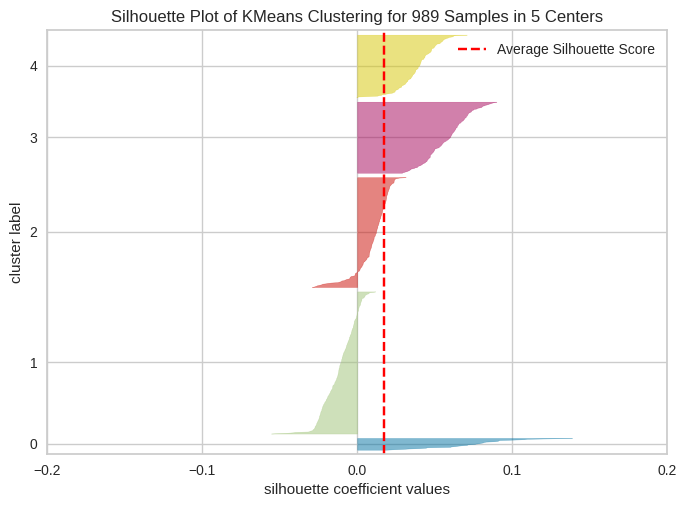

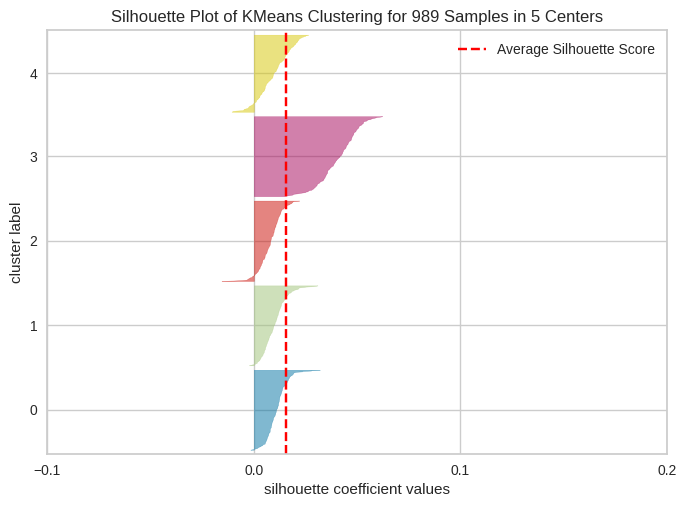

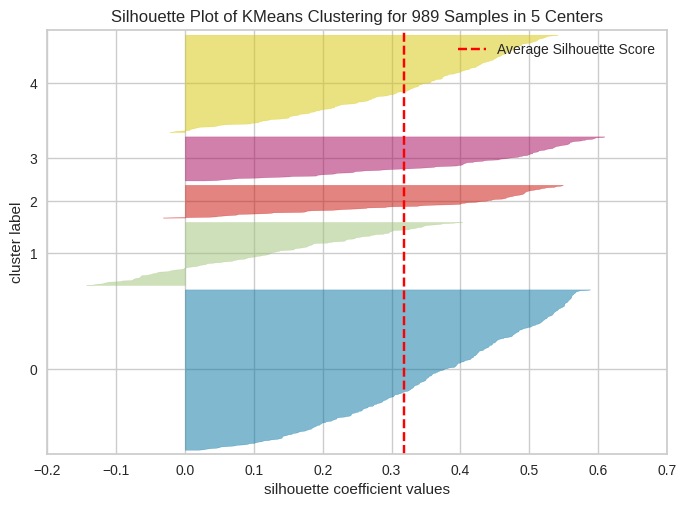

In [ ]:
visualize_silhouette_kmeans(x, km_bow_pred,"BOW");
visualize_silhouette_kmeans(xx, km_tfidf_pred,"TF_IDF");
visualize_silhouette_kmeans(X_word_emb, km_em_pred,"Word_Embidding");



## **EM with Bow**

In [ ]:
gmm_model= GaussianMixture(n_components=5 ,
                             covariance_type= "spherical" ,
                             n_init= 5 )

em_bow_lables= gmm_model.fit_predict(x)

## **EM with TF_IDF**

In [ ]:
gmm_model= GaussianMixture(n_components=5 ,
                             covariance_type= "spherical" ,
                             n_init= 5 )

em_tf_idf_pred= gmm_model.fit_predict(xx)

## **EM with word_embidding**

In [ ]:
gmm_model= GaussianMixture(n_components=5 ,
                             covariance_type= "spherical" ,
                             n_init= 5 )
em_word_emb_labels= gmm_model.fit_predict(X_word_emb)

In [ ]:
##em_word_emb_pred

##**EM with LDA**

In [ ]:
gmm_model= GaussianMixture(n_components=5 ,
                             covariance_type= "spherical" ,
                             n_init= 5 )
em_lda_labels= gmm_model.fit(lda_df)
em_lda_labels=em_lda_labels.predict(lda_df)

##**Kappa with EM**


In [ ]:
labels3=map_labelv2(em_bow_lables, human_label1, num_class=5)
print("Kappa Score of K-means With BOW           :  {:.4f}".format(cohen_kappa_score(labels3, em_bow_lables)))

Kappa Score of K-means With BOW           :  0.5947


In [ ]:
labels4=map_labelv2(em_tf_idf_pred, human_label1, num_class=5)
print("Kappa Score of K-means With TFIDF         :  {:.4f}".format(cohen_kappa_score(labels4, em_tf_idf_pred)))

Kappa Score of K-means With TFIDF         :  0.6353


In [ ]:
labels5=map_labelv2(em_word_emb_labels, human_label1, num_class=5)
print("Kappa Score of K-means With Word2Vec      :  {:.4f}".format(cohen_kappa_score(labels5, em_word_emb_labels)))

Kappa Score of K-means With Word2Vec      :  0.3317


In [ ]:
labels6=map_labelv2(lda_pred, human_label1, num_class=5)
print("Kappa Score of K-means With LDA           :  {:.4f}".format(cohen_kappa_score(labels6, lda_pred)))

Kappa Score of K-means With LDA           :  0.2959


## **Silhouette with EM**

In [ ]:
print("Silhouette Score of KM With BOW      :  {:.4f}".format(silhouette_score(x, em_bow_lables)))
print("Silhouette Score of Km With TFIDF    :  {:.4f}".format(silhouette_score(xx, em_tf_idf_pred)))
print("Silhouette Score of KM With Word2Vec :  {:.4f}".format(silhouette_score(X_word_emb,em_word_emb_labels)))
print("Silhouette Score of KM  With LDA      :  {:.4f}".format(silhouette_score(x, lda_pred)))

Silhouette Score of KM With BOW      :  0.0102
Silhouette Score of Km With TFIDF    :  0.0157
Silhouette Score of KM With Word2Vec :  0.2845
Silhouette Score of KM  With LDA      :  0.0166


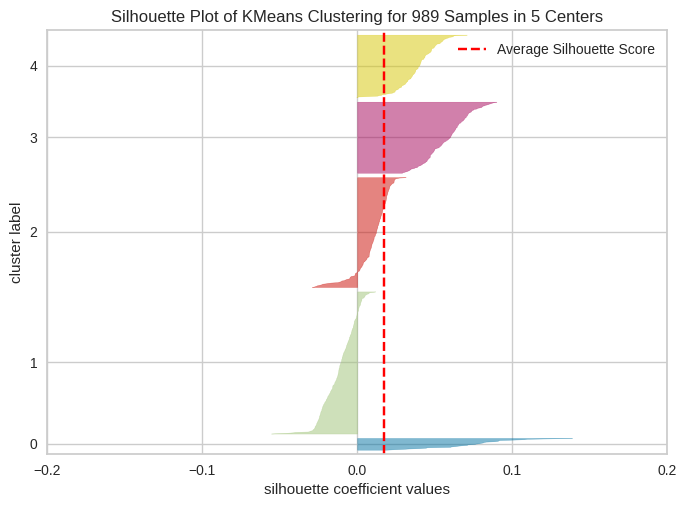

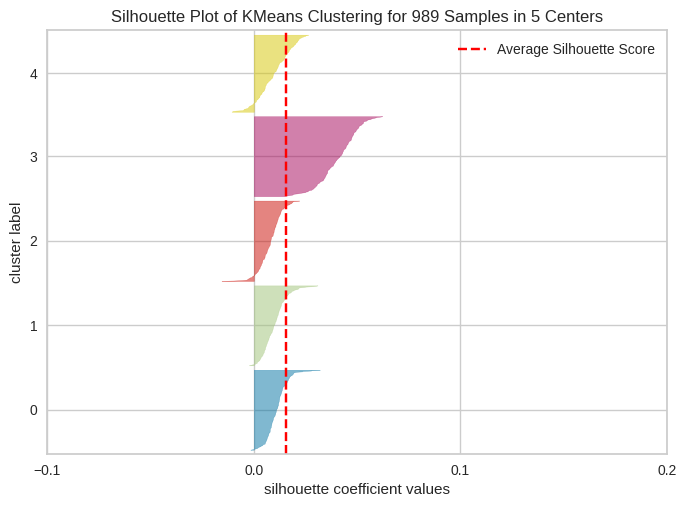

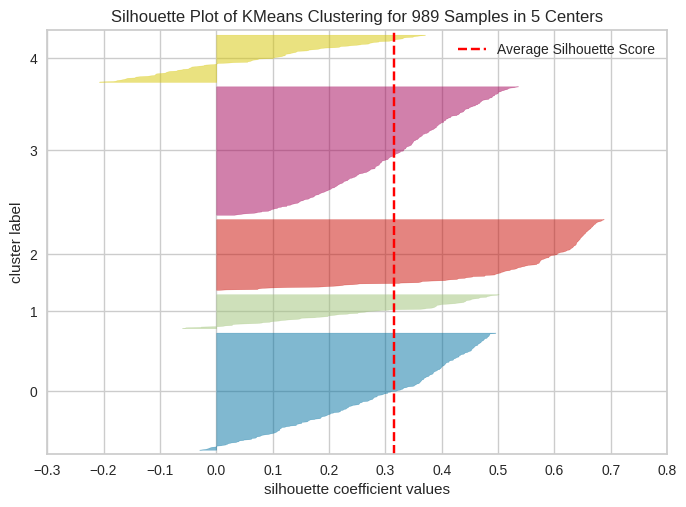

In [ ]:
visualize_silhouette_kmeans(x, km_bow_pred,"BOW");
visualize_silhouette_kmeans(xx, km_tfidf_pred,"TF_IDF");
visualize_silhouette_kmeans(X_word_emb,km_em_pred,"Word_Embidding");

##**(3) Hierarchical clustering (Agglomerative)**


(3.1)Hierarchical clustering with bow





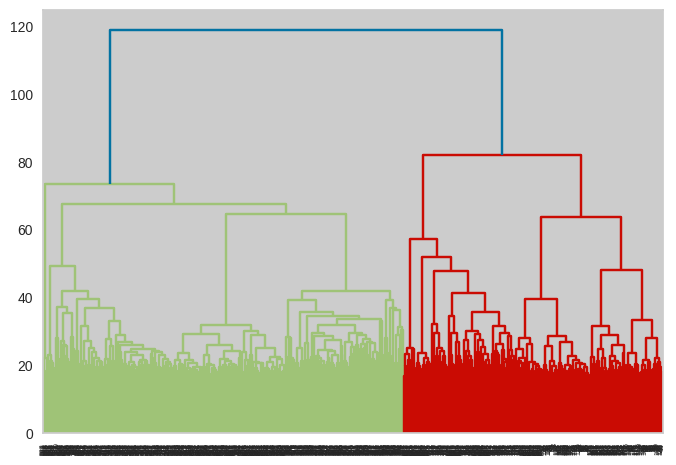

In [ ]:
dendrogram= shc.dendrogram(shc.linkage(x, method='ward'))
aggregate_model= AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
H_bow_pred= aggregate_model.fit_predict(x)

(3.2)Hierarchical clustering with tfidf


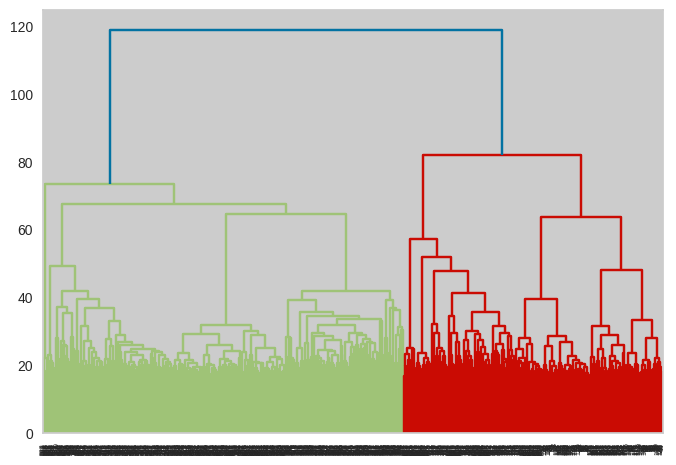

In [ ]:
dendrogram= shc.dendrogram(shc.linkage(x, method='ward'))
aggregate_model= AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
H_tfidf_pred= aggregate_model.fit_predict(tfidf_df)

(3.3)Hierarchical clustering with word_emb


In [ ]:
dendrogram= shc.dendrogram(shc.linkage(x, method='ward'))
aggregate_model= AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
H_word_emb_pred= aggregate_model.fit_predict(X_word_emb)

(3.4)Hierarchical clustering with lda


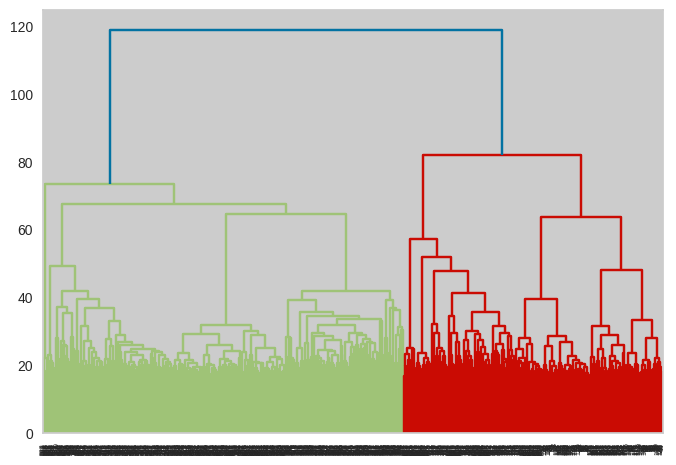

In [ ]:
dendrogram= shc.dendrogram(shc.linkage(x, method='ward'))
aggregate_model= AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
H_lda_pred= aggregate_model.fit_predict(lda_df)

## **Kappa with Hierarcial clustering**


In [ ]:
labels10=map_labelv2(H_bow_pred,human_label1,num_class=5)
print("Kappa Score of K-means With BOW           :  {:.4f}".format(cohen_kappa_score(H_bow_pred,labels10)))

Kappa Score of K-means With BOW           :  0.6794


In [ ]:
labels11=map_labelv2(H_tfidf_pred,human_label1,num_class=5)
print("Kappa Score of K-means With TFIDF         :  {:.4f}".format(cohen_kappa_score(H_tfidf_pred,labels11)))

Kappa Score of K-means With TFIDF         :  0.9633


In [ ]:
labels12=map_labelv2(H_word_emb_pred,human_label1,num_class=5)
print("Kappa Score of K-means With Word2Vec      :  {:.4f}".format(cohen_kappa_score(H_word_emb_pred,labels12)))

Kappa Score of K-means With Word2Vec      :  0.1076


In [ ]:
labels13=map_labelv2(H_lda_pred,human_label1,num_class=5)
print("Kappa Score of K-means With LDA           :  {:.4f}".format(cohen_kappa_score(H_lda_pred,labels13)))

Kappa Score of K-means With LDA           :  1.0000


In [ ]:
print("Silhouette Score of KM With BOW      :  {:.4f}".format(silhouette_score(x, H_bow_pred)))
print("Silhouette Score of Km With TFIDF    :  {:.4f}".format(silhouette_score(xx, H_tfidf_pred)))
print("Silhouette Score of KM With Word2Vec :  {:.4f}".format(silhouette_score(X_word_emb,H_word_emb_pred)))
print("Silhouette Score of KM  With LDA      :  {:.4f}".format(silhouette_score(x, H_lda_pred)))

Silhouette Score of KM With BOW      :  0.0166
Silhouette Score of Km With TFIDF    :  0.0128
Silhouette Score of KM With Word2Vec :  0.1750
Silhouette Score of KM  With LDA      :  0.0166


# **Evaluation with Coherence**

In [ ]:
def cohere(model, df_columnm):
    # extract the topic-word distributions from the LDA model
    topics = model.components_

    # set the number of top words to consider for coherence calculation
    n_top_words = 20

    # tokenize the text in the specified column of the input dataframe
    texts = [[word for word in doc.split()] for doc in df_columnm]

    # create a dictionary from the tokenized text
    dictionary = corpora.Dictionary(texts)

    # create a corpus from the dictionary and tokenized text
    corpus = [dictionary.doc2bow(text) for text in texts]

    # get the feature names from the dictionary
    feature_names = [dictionary[i] for i in range(len(dictionary))]

    # get the top n words for each topic and store them in a list
    top_words = []
    for topic in topics:
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

    # calculate the coherence score for the model using the top words, texts, and dictionary
    coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()

    # return the coherence score
    return coherence

# **Coherence With LDA**

In [ ]:
cohere(lda,data['partitions'])

0.7731707852584085

##**Error Analysis**

# **Elbow method with BOW**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

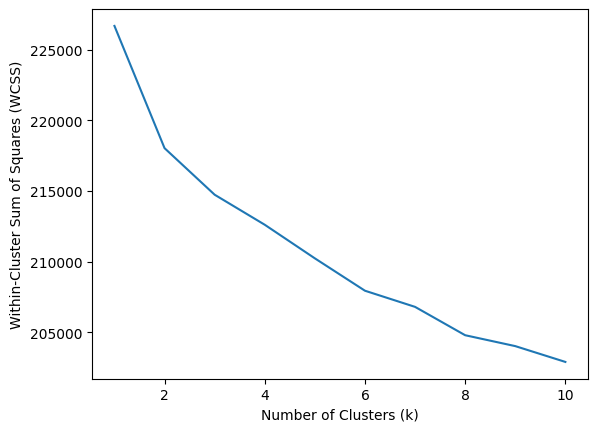

In [25]:
wcss = []
for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(x)
    wcss.append(clustering.inertia_)

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x=ks, y=wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# **Elbow method with TF-IDF**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

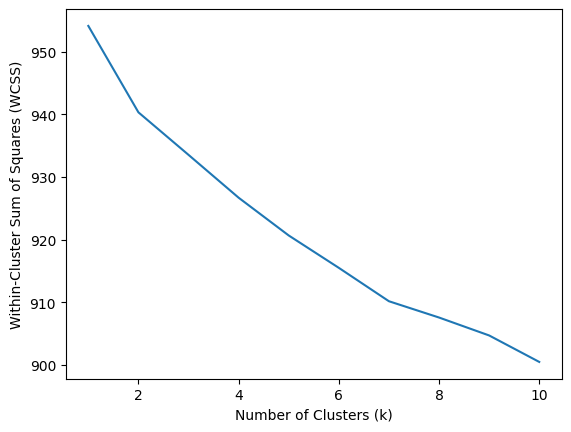

In [24]:
wcss = []
for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(xx)
    wcss.append(clustering.inertia_)

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x=ks, y=wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# **Visualize the most frequent words using WordCloud**


 The most frequent 50 words of book: Travels in Central Asia



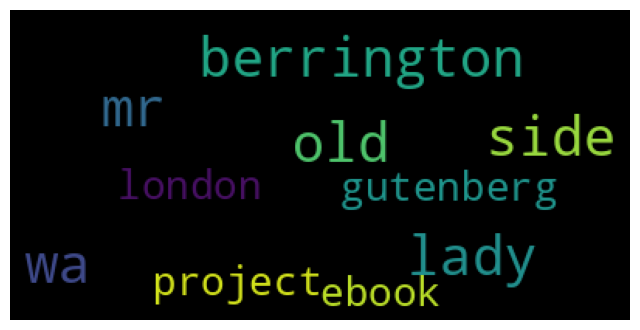


 The most frequent 50 words of book:  Chicago by day and night



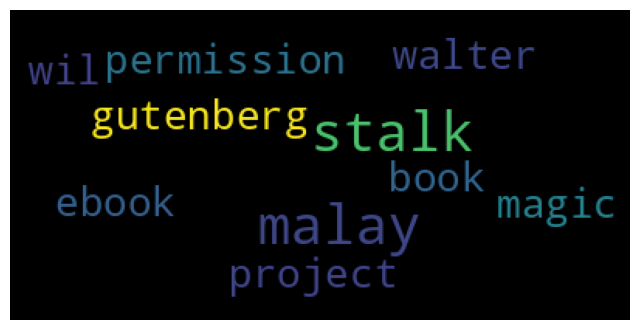


 The most frequent 50 words of book: A London Life



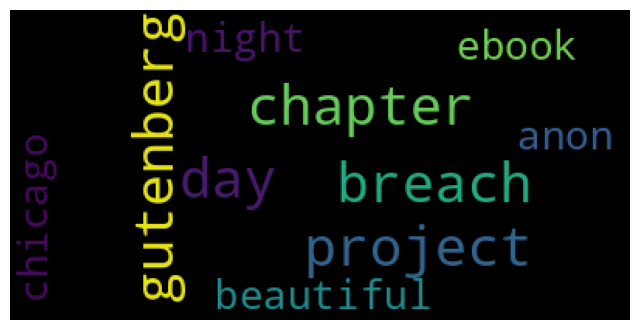


 The most frequent 50 words of book: Malay Magic 



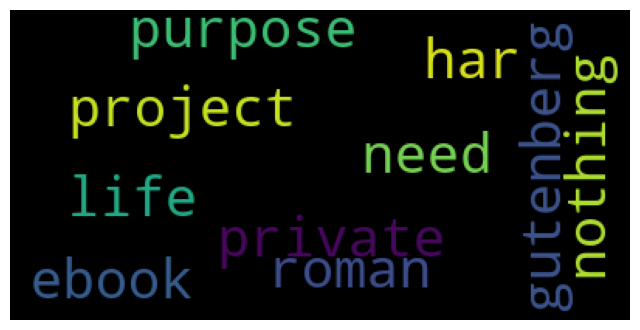


 The most frequent 50 words of book: The Picture of Dorian Gray



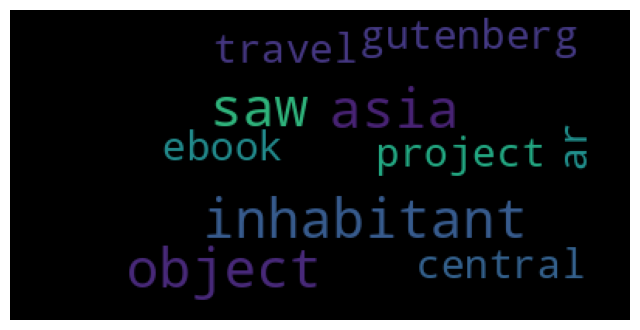

In [ ]:
for label in data['title'].unique():
  books = data[data["title"]==label]["partitions"]

  #wordcloud
  print(f"\n The most frequent 50 words of book: {label}\n")
  wc = wordcloud.WordCloud(background_color='black', max_words=10,
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()